In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_colwidth = 200

In [2]:
### Import Bases
df = pd.read_csv('data/cagedPreFiltradoFinal.csv', encoding='utf-8')
df_desc_cnae = pd.read_csv('data/descricao_cnae.csv',encoding='latin1')

In [3]:
df.columns = ['cd_secao_cnae','cd_municipio','municipio','uf','faixa_empregados','competencia','fluxo']
# Descrição do Porte da Empresa
df['faixa_empregados_descr']= df['faixa_empregados'].replace([-1,1,2,3,4,5,6,7,8,9],
                                                                   ['IGNORADO',
                                                                    'ATE 4',
                                                                    'DE 5 A 9',
                                                                    'DE 10 A 19',
                                                                    'DE 20 A 49',
                                                                    'DE 50 A 99',
                                                                    'DE 100 A 249',
                                                                    'DE 250 A 499',
                                                                    'DE 500 A 999',
                                                                    '1000 OU MAIS'])

# Join para incluir descrição do CNAE
df = pd.merge(df, df_desc_cnae,how='left', on=['cd_secao_cnae'])
df['data_ref'] = (df['competencia'].str[:4])+(df['competencia'].str[5:].str[:2])
df['ano_ref'] = (df['competencia'].str[:4])
df['data_ref'] = df['data_ref'].astype(int)
df['ano_ref'] = df['ano_ref'].astype(int)

In [4]:
df.head(2)

,cd_secao_cnae,cd_municipio,municipio,uf,faixa_empregados,competencia,fluxo,faixa_empregados_descr,descr_secao_cnae,data_ref,ano_ref
0,A,5200050,ABADIA DE GOIAS,GO,1,2018-09-01,1,ATE 4,"AGRICULTURA, PECUÁRIA, PROD FLORESTAL, PESCA E AQUICULTURA",201809,2018
1,A,5200050,ABADIA DE GOIAS,GO,1,2019-04-01,1,ATE 4,"AGRICULTURA, PECUÁRIA, PROD FLORESTAL, PESCA E AQUICULTURA",201904,2019


In [5]:
df_caged = df.copy()

In [6]:
df_caged.shape

(16142269, 11)

### Separando Periodo da pandemia (2020-02)

In [7]:
antes = df_caged[df_caged['data_ref']<202002]

In [8]:
depois = df_caged[df_caged['data_ref']>202001]

###  Contrações Antes e Depois da Pandemia (Antes de Fevereiro 2020)

In [9]:
#Antes da pandemia
fluxo = antes[['fluxo','data_ref']].groupby(['data_ref']).sum()
fluxo = fluxo.reset_index()
fluxo_antes = fluxo[fluxo['data_ref']>201801]
fluxo_antes.head(10)

,data_ref,fluxo
132,201802,68760
133,201803,58609
134,201804,120387
135,201805,9313
136,201806,-28244
137,201807,39235
138,201808,125735
139,201809,159736
140,201810,72319
141,201811,78821


In [10]:
#Depois
fluxo = depois[['fluxo','data_ref']].groupby(['data_ref']).sum()
fluxo_depois = fluxo.reset_index()
fluxo_depois.head(10)

,data_ref,fluxo
0,202002,230180
1,202003,-260313
2,202004,-952125
3,202005,-379140
4,202006,-31460


Text(0.5, 0, 'Periodo')

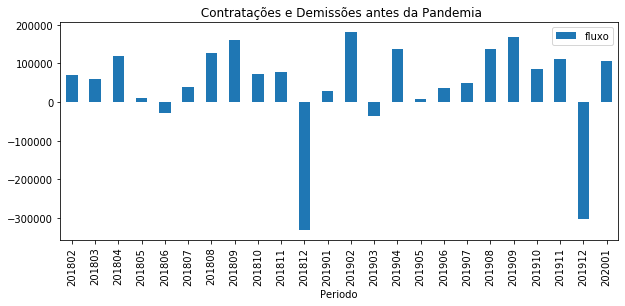

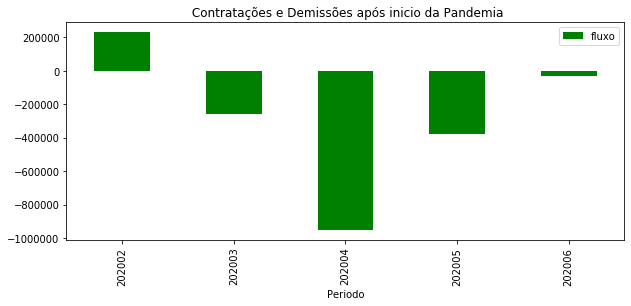

In [11]:
ax = fluxo_antes.plot(kind = "bar", x = 'data_ref',title = " Contratações e Demissões antes da Pandemia",figsize = (10,4))
ax.set_xlabel("Periodo")
ax = fluxo_depois.plot(kind = "bar", x = 'data_ref',title = " Contratações e Demissões após inicio da Pandemia",color = 'green',figsize = (10,4))

ax.set_xlabel("Periodo")

###  Contrações Com "Janela" de Quatro meses da Pandemia por Estados
* Antes  (Out-19 a Jan-20)  
* Depois (Fev-20 a Jun-20) 

In [12]:
#Antes
antes_filtro = antes[antes['data_ref']>201909]
fluxo_antes = antes_filtro[['fluxo','uf']].groupby(['uf']).sum()
fluxo_antes = fluxo_antes.reset_index()
fluxo_antes.head()

,uf,fluxo
0,AC,-954
1,AL,-2541
2,AM,-691
3,AP,154
4,BA,-5018


In [13]:
#Depois
fluxo_depois = depois[['fluxo','uf']].groupby(['uf']).sum()
fluxo_depois = fluxo_depois.reset_index()
fluxo_depois.head()

,uf,fluxo
0,AC,669
1,AL,-35643
2,AM,-15487
3,AP,-1573
4,BA,-59179


Text(0.5, 0, 'Estados - UF')

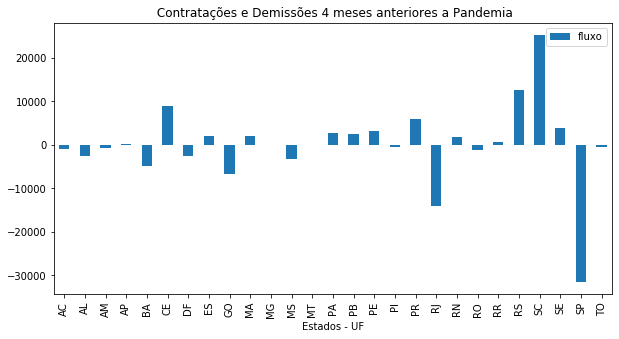

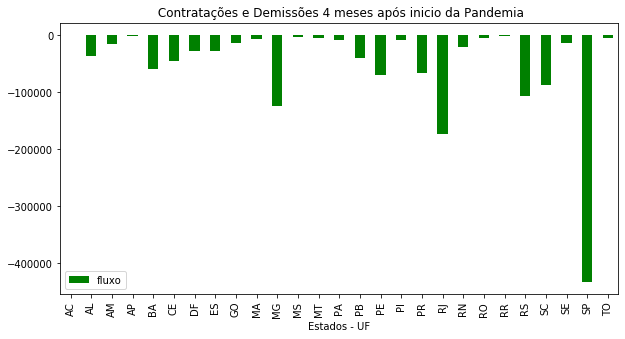

In [14]:
ax = fluxo_antes.plot(kind = "bar", x = 'uf',title = " Contratações e Demissões 4 meses anteriores a Pandemia",figsize = (10,5))
ax.set_xlabel("Estados - UF")
ax = fluxo_depois.plot(kind = "bar", x = 'uf',title = " Contratações e Demissões 4 meses após inicio da Pandemia",color = 'green',figsize = (10,5))
ax.set_xlabel("Estados - UF")

###  Estados que tiveram saldo positivo de empregos após a Pandemia

In [15]:
fluxo_depois.sort_values(by = 'fluxo', ascending = False).head(5)

,uf,fluxo
0,AC,669
21,RR,-727
3,AP,-1573
11,MS,-2474
12,MT,-4391


###  Estados que tiveram maior saldo negativo de empregos após a Pandemia

In [16]:
fluxo_depois.sort_values(by = 'fluxo', ascending = True).head(5)

,uf,fluxo
25,SP,-432868
18,RJ,-173430
10,MG,-123453
22,RS,-105606
23,SC,-87052


###  CNAES que mais contraram 
####  4 meses antes da Pandemia

In [17]:
valor_antes_cnae = antes_filtro[['descr_secao_cnae','fluxo']].groupby(['descr_secao_cnae']).sum()
valor_antes_cnae = valor_antes_cnae.reset_index()
valor_antes_cnae.columns = ['Ramo de Atividade','Novos Empregos']
valor_antes_cnae.sort_values(by = 'Novos Empregos', ascending = False ).head(10)

,Ramo de Atividade,Novos Empregos
8,COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS,128155
2,ALOJAMENTO E ALIMENTAÇÃO,32894
4,ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEMENTARES,32675
17,SAÚDE HUMANA E SERVIÇOS SOCIAIS,12980
7,"ATIVIDADES PROFISSIONAIS, CIENTÍFICAS E TÉCNICAS",10897
14,INFORMAÇÃO E COMUNICAÇÃO,9995
3,"ARTES, CULTURA, ESPORTE E RECREAÇÃO",3140
6,ATIVIDADES IMOBILIÁRIAS,900
20,"ÁGUA, ESGOTO, ATIVIDADES DE GESTÃO DE RESÍDUOS E DESCONTAMINAÇÃO",328
15,ORGANISMOS INTERNACIONAIS E OUTRAS INSTITUIÇÕES EXTRATERRITORIAIS,41


#### 4 meses depois da Pandemia

In [18]:
valor_depois_cnae = depois[['descr_secao_cnae','fluxo']].groupby(['descr_secao_cnae']).sum()
valor_depois_cnae = valor_depois_cnae.reset_index()
valor_depois_cnae.columns = ['Ramo de Atividade','Novos Empregos']
valor_depois_cnae.sort_values(by = 'Novos Empregos', ascending = False ).head(10)

,Ramo de Atividade,Novos Empregos
17,SAÚDE HUMANA E SERVIÇOS SOCIAIS,45012
0,"ADMINISTRAÇÃO PÚBLICA, DEFESA E SEGURIDADE SOCIAL",16015
1,"AGRICULTURA, PECUÁRIA, PROD FLORESTAL, PESCA E AQUICULTURA",11978
10,EDUCAÇÃO,3649
11,ELETRICIDADE E GÁS,122
13,INDÚSTRIAS EXTRATIVAS,104
15,ORGANISMOS INTERNACIONAIS E OUTRAS INSTITUIÇÕES EXTRATERRITORIAIS,-28
18,SERVIÇOS DOMÉSTICOS,-33
6,ATIVIDADES IMOBILIÁRIAS,-4441
20,"ÁGUA, ESGOTO, ATIVIDADES DE GESTÃO DE RESÍDUOS E DESCONTAMINAÇÃO",-4777


###  CNAES que mais demitiram 
####  4 meses antes da Pandemia

In [19]:
valor_antes_cnae.sort_values(by = 'Novos Empregos', ascending = True ).head(10)

,Ramo de Atividade,Novos Empregos
10,EDUCAÇÃO,-71920
12,INDÚSTRIAS DE TRANSFORMAÇÃO,-59347
1,"AGRICULTURA, PECUÁRIA, PROD FLORESTAL, PESCA E AQUICULTURA",-42131
0,"ADMINISTRAÇÃO PÚBLICA, DEFESA E SEGURIDADE SOCIAL",-18024
9,CONSTRUÇÃO,-13747
19,"TRANSPORTE, ARMAZENAGEM E CORREIO",-11411
16,OUTRAS ATIVIDADES DE SERVIÇOS,-10745
5,"ATIVIDADES FINANCEIRAS, DE SEGUROS E SERVIÇOS RELACIONADOS",-2116
11,ELETRICIDADE E GÁS,-1747
13,INDÚSTRIAS EXTRATIVAS,-271


#### 4 meses depois da Pandemia

In [20]:
valor_depois_cnae.sort_values(by = 'Novos Empregos', ascending = True ).head(10)

,Ramo de Atividade,Novos Empregos
8,COMÉRCIO; REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS,-450076
2,ALOJAMENTO E ALIMENTAÇÃO,-320809
12,INDÚSTRIAS DE TRANSFORMAÇÃO,-312316
4,ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEMENTARES,-122856
19,"TRANSPORTE, ARMAZENAGEM E CORREIO",-90857
9,CONSTRUÇÃO,-53179
3,"ARTES, CULTURA, ESPORTE E RECREAÇÃO",-30604
7,"ATIVIDADES PROFISSIONAIS, CIENTÍFICAS E TÉCNICAS",-30111
16,OUTRAS ATIVIDADES DE SERVIÇOS,-28434
14,INFORMAÇÃO E COMUNICAÇÃO,-14698


### Municipios que mais geraram emprego após a Pandemia

In [21]:
valor_depois_mun = depois[['municipio','uf','fluxo']].groupby(['municipio','uf']).sum()
valor_depois_mun  = valor_depois_mun .reset_index()
valor_depois_mun.columns = ['Municipio','UF','Novos Empregos']
valor_depois_mun.sort_values(by = 'Novos Empregos', ascending = False ).head(10)

,Municipio,UF,Novos Empregos
5378,VENANCIO AIRES,RS,3096
3555,PARAUAPEBAS,PA,2558
3858,PONTAL,SP,2270
4324,SANTA CRUZ DO SUL,RS,2247
2956,MATELANDIA,PR,1813
4582,SAO FRANCISCO DE ITABAPOANA,RJ,1576
1904,GOIANESIA,GO,1408
4402,SANTA RITA DO PASSA QUATRO,SP,1377
4742,SAO LUIS,MA,1360
5446,VISTA ALEGRE DO ALTO,SP,1137


### Municipios que mais demitiram após a Pandemia

In [22]:
valor_depois_mun.sort_values(by = 'Novos Empregos', ascending = True ).head(10)

,Municipio,UF,Novos Empregos
4784,SAO PAULO,SP,-175005
4151,RIO DE JANEIRO,RJ,-101715
584,BELO HORIZONTE,MG,-38344
1493,CURITIBA,PR,-29272
747,BRASILIA,DF,-27025
1811,FORTALEZA,CE,-23156
3893,PORTO ALEGRE,RS,-22855
4274,SALVADOR,BA,-20596
4054,RECIFE,PE,-19067
2013,GUARULHOS,SP,-18199


### Tipos de Empresas mais afetadas pela Pandemia

In [23]:
valor_depois_emp = depois[['faixa_empregados_descr','fluxo']].groupby(['faixa_empregados_descr']).sum()
valor_depois_emp  = valor_depois_emp.reset_index()
valor_depois_emp.columns = ['Tipo da Empresa','Novos Empregos']
valor_depois_emp.sort_values(by = 'Novos Empregos', ascending = True).head(10)

,Tipo da Empresa,Novos Empregos
9,DE 50 A 99,-347059
6,DE 20 A 49,-284980
4,DE 10 A 19,-238149
5,DE 100 A 249,-201562
7,DE 250 A 499,-179073
8,DE 5 A 9,-166862
10,DE 500 A 999,-93672
0,10,-92633
2,1000 OU MAIS,-63180
1,99,-1972


### Tipos de Empresas mais afetadas pela Pandemia por UF

In [24]:
valor_depois_uf = depois[['faixa_empregados_descr','uf','fluxo']].groupby(['faixa_empregados_descr','uf']).sum()
valor_depois_uf  = valor_depois_uf.reset_index()
valor_depois_uf.columns = ['Tipo da Empresa','Estado UF','Novos Empregos']
valor_depois_uf.sort_values(by = 'Novos Empregos', ascending = True).head(10)

,Tipo da Empresa,Estado UF,Novos Empregos
267,DE 50 A 99,SP,-108446
186,DE 20 A 49,SP,-81727
132,DE 10 A 19,SP,-69052
159,DE 100 A 249,SP,-68792
213,DE 250 A 499,SP,-60286
240,DE 5 A 9,SP,-47792
260,DE 50 A 99,RJ,-37279
252,DE 50 A 99,MG,-30919
294,DE 500 A 999,SP,-29602
179,DE 20 A 49,RJ,-29488
